In [2]:
#All necessary libraries 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import json
import requests
import pycountry
from scipy import stats
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [4]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].ffill().bfill()
    return name

In [19]:
def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years.loc[(years.country.isin(GEI_worst15.country)),:]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    return years_worst_sorted

In [20]:
#Search All Countries in wbdata
#wbdata.search_countries("")

In [21]:
# Get data on all countries
#wbdata.get_data("IQ.CPA.GNDR.XQ")


In [22]:
# Dataframe per category with all countries
#CPIA_all = pd.DataFrame(wbdata.get_data("IQ.CPA.GNDR.XQ"))
GEI_all = clean("IQ.CPA.GNDR.XQ")
#GEI_all = fillna(CPIA_all)

# Filter the dataset on year and on country code which are not numeric
GEI_all_year_alpha = GEI_all.loc[(GEI_all['date'] == 2017) & (GEI_all.country_code.str.isalpha())]
GEI_OnlyCountries = GEI_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
GEI_worst15 = GEI_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [23]:
#Set column 'value' as type 'float' and round the value to zero decimals
# CPIA_all['value'] = CPIA_all.value.astype(float).round(1)
# CPIA_all['date'] = CPIA_all.date.astype(int)

In [24]:
# Clean up column 'country' and ' indicator'
# CPIA_all['country_code'] = CPIA_all.country.astype(str).str.slice(8,10)
# CPIA_all['country'] = CPIA_all.country.astype(str).str.slice(23,-2)
# CPIA_all['indicator'] = CPIA_all.indicator.astype(str).str.slice(35,-2)
# CPIA_all

In [25]:
# if you want to group the countries. However this is not a good metric because some countries have more data points than other countries.
#CPIA_all_grouped = CPIA_all.groupby(['country']).sum()
#CPIA_all_grouped

In [26]:
# # Top 15 Countries with worst 'CPA' rating

# # Filter the dataset on 'value' bigger or equal to zero (to not show NaN values) and on a specific 'date'
# # Here i have chosen the date '2008'
# CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]

# CPIA_OnlyCountries = CPIA_all_year_alpha[17:]


# #Sort CPIA by 'value' in a descending order
# #CPIA_all_year.sort_values(by='value', ascending=False )

# #Count all the countries that received a rating in that year
# #CPIA_all_year.country.count()

# #sort the countries by 'value' (their rating) at 'date' .. and only show the Top 25 (sort in descending order and slice)
# CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]
# CPIA_worst15
# # #to .csv file 
# # CPIA_worst15.to_csv("CPIA_worst15.csv", sep=',', encoding='utf-8')

# # #DataFrame
# # CPIA_worst15

In [27]:
# Puur om de 'niet-landen' weg te halen. hoeft niet te gebruiken en is per databestand anders.
# CPIA_2007_2017 = CPIA_all.loc[(CPIA_all['date'] >= 2007) & (CPIA_all['date'] <= 2017) & (CPIA_all.country_code.str.isalpha())]
# CPIA_2007_2017

In [28]:
# CPIA_worst15_2007_2017 = CPIA_2007_2017[CPIA_2007_2017.country.isin(list(CPIA_worst15.country))]
# CPIA_worst15_2007_2017
# CPIA_years = CPIA_worst15_2007_2017.sort_values(by='date', ascending=True)
# #to .csv file 
# CPIA_years.to_csv("CPIA_years.csv", sep=',', encoding='utf-8')

# CPIA_years

In [29]:
#CPIA_years[CPIA_years.country =='Somalia']

# Backwards fill missing data
# CPIA_years.loc[CPIA_years['country'] == 'Somalia'] = CPIA_years.loc[(CPIA_years['country'] == 'Somalia')].bfill()
# CPIA_years[CPIA_years.country =='Micronesia, Fed. Sts.'] = CPIA_years[(CPIA_years.country =='Micronesia, Fed. Sts.')].bfill()
# CPIA_years[CPIA_years.country =='South Sudan'] = CPIA_years[(CPIA_years.country =='South Sudan')].bfill()

In [30]:
# CPIA_years

In [31]:
GEI_years15 = getYears15(GEI_all)

In [32]:
def graph(dataframe, title_graph = '', x_label = '', y_label = ''):
    # Visualising changes over time per indicator

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date, dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)  

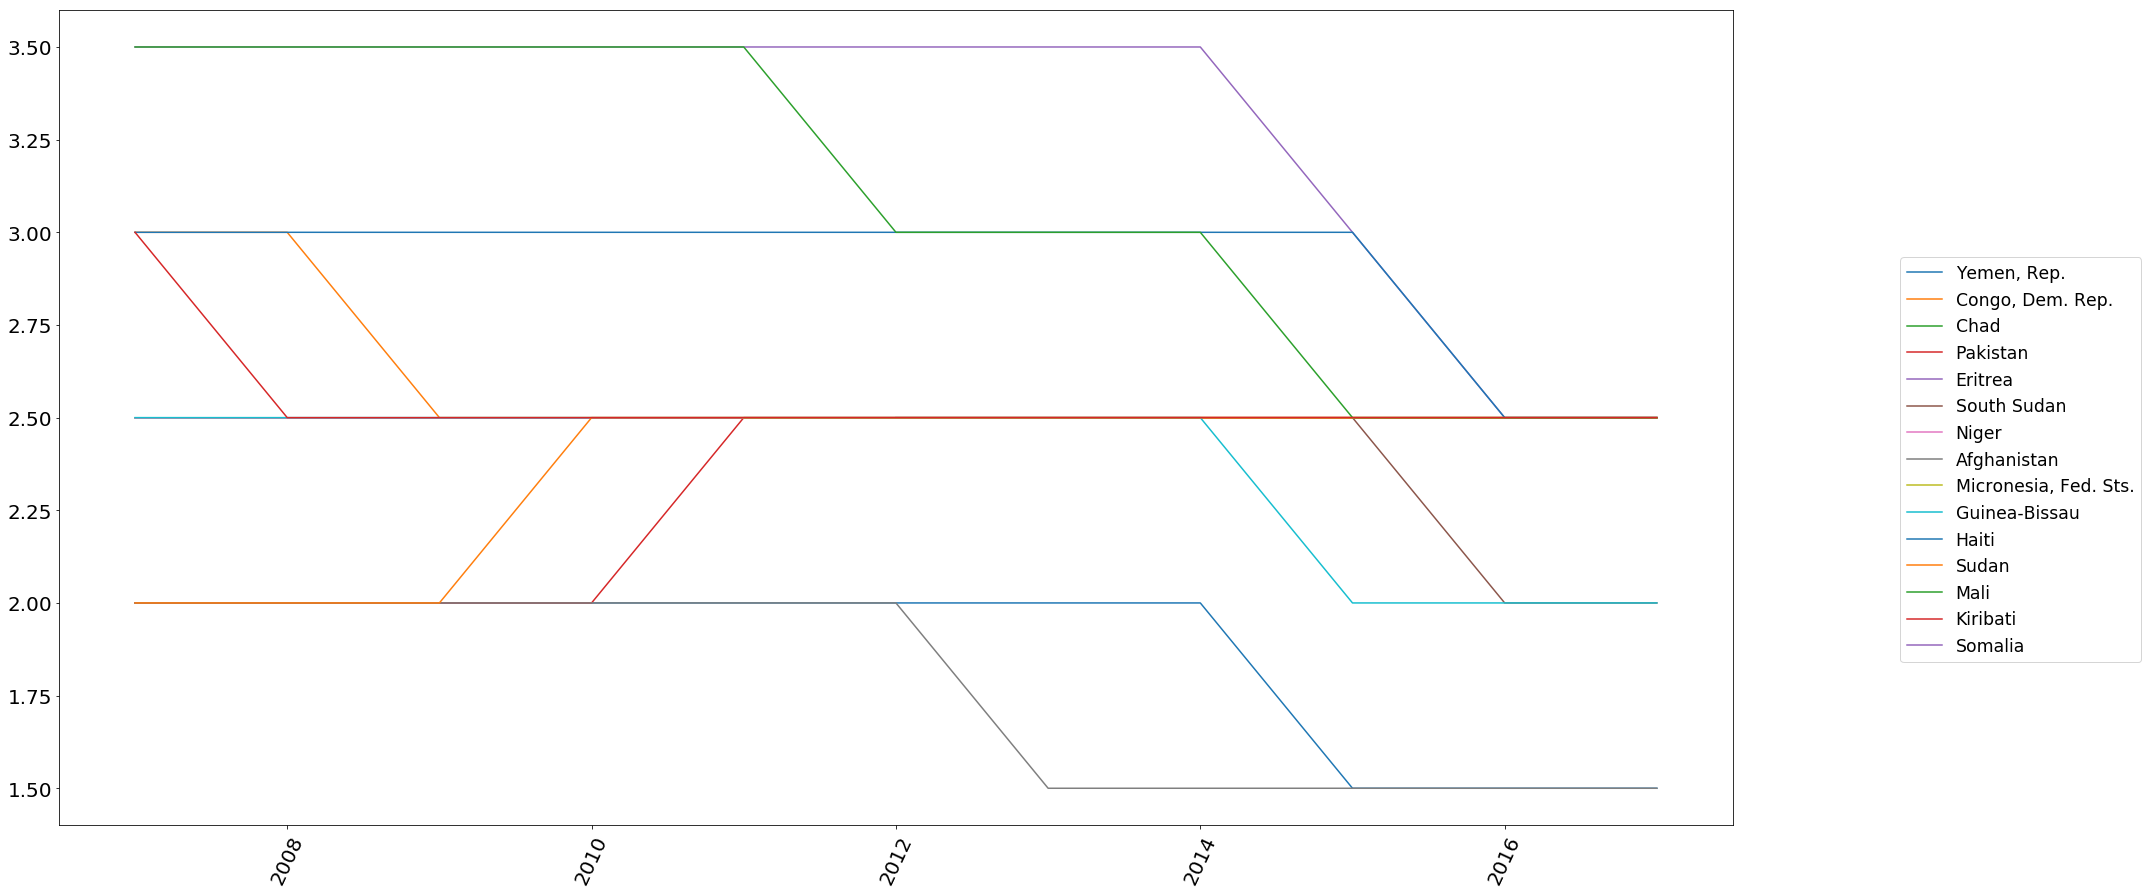

In [34]:
graph(GEI_years15)

In [35]:
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True, figsize=(10,10),)


# CPIA_years[CPIA_years['country'] == 'Afghanistan'].plot(x='date', y='value', legend=False, ax=ax1)
# ax1.set_title("Afghanistan")
# CPIA_years[CPIA_years['country'] == 'Chad'].plot(x='date', y='value', legend=False, ax=ax2)
# ax2.set_title("Chad")
# CPIA_years[CPIA_years['country'] == 'Congo, Dem. Rep.'].plot(x='date', y='value', legend=False, ax=ax3)
# ax3.set_title("Congo, Dem. Rep.")
# CPIA_years[CPIA_years['country'] == 'Eritrea'].plot(x='date', y='value', legend=False, ax=ax4)
# ax4.set_title("Eritrea")
# CPIA_years[CPIA_years['country'] == 'Guinea-Bissau'].plot(x='date', y='value', legend=False, ax=ax5)
# ax5.set_title("Guinea-Bissau")
# CPIA_years[CPIA_years['country'] == 'Haiti'].plot(x='date', y='value', legend=False, ax=ax6)
# ax6.set_title("Haiti")
# CPIA_years[CPIA_years['country'] == 'Kiribati'].plot(x='date', y='value', legend=False, ax=ax7)
# ax7.set_title("Kiribati")
# CPIA_years[CPIA_years['country'] == 'Mali'].plot(x='date', y='value', legend=False, ax=ax8)
# ax8.set_title("Mali")
# CPIA_years[CPIA_years['country'] == 'Micronesia, Fed. Sts.'].plot(x='date', y='value', legend=False, ax=ax9)
# ax9.set_title("Micronesia, Fed. Sts.")
# CPIA_years[CPIA_years['country'] == 'Niger'].plot(x='date', y='value', legend=False, ax=ax10)
# ax10.set_title("Niger")
# CPIA_years[CPIA_years['country'] == 'Pakistan'].plot(x='date', y='value', legend=False, ax=ax11)
# ax11.set_title("Pakistan")
# CPIA_years[CPIA_years['country'] == 'Somalia'].plot(x='date', y='value', legend=False, ax=ax12)
# ax12.set_title("Somalia")
# CPIA_years[CPIA_years['country'] == 'South Sudan'].plot(x='date', y='value', legend=False, ax=ax13)
# ax13.set_title("South Sudan")
# CPIA_years[CPIA_years['country'] == 'Sudan'].plot(x='date', y='value', legend=False, ax=ax14)
# ax14.set_title("Sudan")
# CPIA_years[CPIA_years['country'] == 'Yemen, Rep.'].plot(x='date', y='value', legend=False, ax=ax15)
# ax15.set_title("Yemen, Rep.")

# plt.suptitle("CPIA rating for every country over the years 2007-2017", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)


# # If you don't do tight_layout() you'll have weird overlaps
# plt.tight_layout()

In [36]:
# #Lineaire regressie nog niet klaar
# x = np.array(CPIA_OnlyCountries['value'])
# y = np.array(NOD_OnlyCountries['value'])
# gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# mn=np.min(x)
# mx=np.max(x)
# x1=np.linspace(mn,mx,500)
# y1=gradient*x1+intercept
# plt.plot(x,y,'ob')
# plt.plot(x1,y1,'-r')
# plt.show()

#### World map

#### Histogram

Text(1.5,250,'$\\mu= 3.378113,\\ \\sigma=0.600784$')

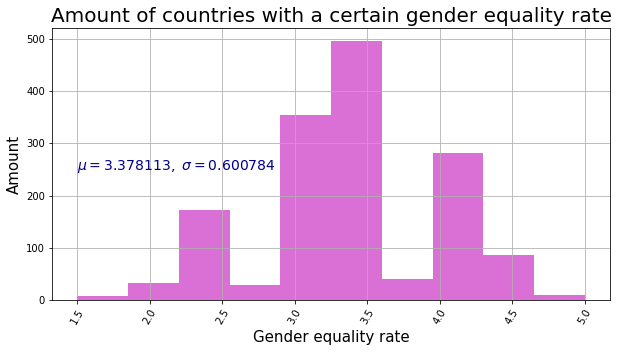

In [41]:
GEI_all['value'].hist(color = 'orchid', figsize=(10, 5))
plt.title("Amount of countries with a certain gender equality rate", fontsize = 20)
plt.xlabel('Gender equality rate', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 60)
plt.yticks(fontsize = 10)

mean = GEI_all['value'].mean()
std = GEI_all['value'].std()


# mu en sigma berekenen? 
# college week 5
plt.text(1.5, 250, r'$\mu= %f,\ \sigma=%f$' %(mean, std), fontsize=14, color='darkblue')

#### Extrapoleren

In [42]:
GEI_all.head()

,country,date,decimal,indicator,value,country_code
0,Arab World,2017,1,CPIA gender equality rating (1=low to 6=high),2.58,1A
1,Arab World,2016,1,CPIA gender equality rating (1=low to 6=high),2.70,1A
2,Arab World,2015,1,CPIA gender equality rating (1=low to 6=high),2.70,1A
3,Arab World,2014,1,CPIA gender equality rating (1=low to 6=high),2.80,1A
4,Arab World,2013,1,CPIA gender equality rating (1=low to 6=high),2.80,1A


In [106]:
#df[1] = pd.DataFrame(CPIA_all.date.unique())
df = pd.DataFrame(GEI_all.groupby('date').value.mean())
GEI_all['date'] = GEI_all['date'].astype(int)
df['date2'] = GEI_all.date.sort_values(ascending = True).unique()
df['date2'] = df['date2'].astype(int)
df.date2.values



# df = pd.DataFrame(CPIA_all.value.mean())
# df.head()
# dict_of_companies = {k: v for k, v in CPIA_all.groupby('date').value}
# df = pd.DataFrame.from_dict(dict_of_companies, orient='index')
# df

# test =pd.Series(CPIA_all.date.values,index=CPIA_all.value).to_dict()
# test

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

C:\Users\veram\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


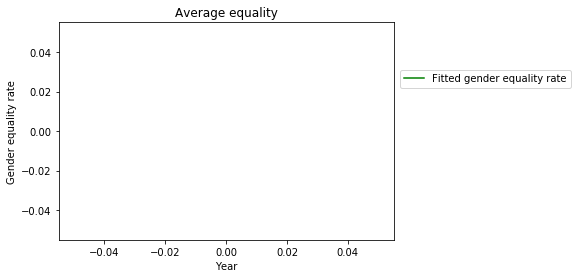

In [108]:
# # create array
# ldate = CPIA_all.date.unique()
# #lvalue = df['value'].values
lvalue = df.value.values

ndeg = 1
#ndate = len(lvalue) 
ndate = df.date2.values

# Use polyfit to find a fitting polynomial, i.e. with degree 3 or 4 (for my random data)
# Poly will contain the coefficients of the found polynomial
poly = np.polyfit(ndate , lvalue, ndeg)

# x-values and y-values of the polyfit. The prediction looks one assignment further.
# Use polyval to use the found coefficients in the polynomial
x_pred = ndate + 13
y_pred = np.polyval(poly, x_pred)

# Plot both the orginal and the fitting function, including prediction
#plt.plot( np.arange(ndate), lvalue, color='Blue', label='Mean gender equality rate')
plt.plot( x_pred, y_pred, color='Green', label='Fitted gender equality rate')

plt.title('Average equality')
plt.xlabel('Year')
plt.ylabel('Gender equality rate')
# plt.xticks(ndate, ldate)

# Put a legend
plt.legend( loc=(1.02, 0.7) )

C:\Users\veram\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


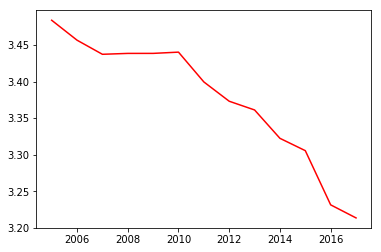

In [91]:
# CPIA_all['date'] = df['date'].astype(int)
# CPIA_all['value'] = df['value'].astype(float)

# ldate = df['date'].values
# lvalue = df['value'].values
# dfList = df['one'].tolist()

ldate = df.date2.values
lvalue = df.value.values

z = np.polyval((np.polyfit(ldate, lvalue, 1)), 1)
new_value = np.append(lvalue, z)
new_date = np.append(ldate, 13)

#plt.bar(new_date, new_value)
plt.plot(new_date, new_value, color = "red")
#plt.xticks(np.arange(1960, 2030, step = 10))

In [51]:
def regression(x , y, xlabel, ylabel):
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:,np.newaxis], y)
    xfit = x
    yfit = model.predict(xfit[:, np.newaxis])
    plt.scatter(x, y)
    plt.plot(xfit,yfit)
    slope, intercept, r_value, p_value, std_err = stats.linregress((x, y))
    pearson_corr_coeff, p_p_value = stats.pearsonr(x,y)
    
    print('This is a simple regression model!\n')
    print('The slope is ' + str(slope) +', the intercept gives ' + str(intercept) )
    if float(p_value) <= 0.05:
        print('The Pearson correlation coefficient is ' + str(pearson_corr_coeff) + ' and with the p-value estimated at ' + str(p_value) + 
              ', and thus smaller than 0.05, which means that the correlation coefficient is significant.')
    else:
        print('The Pearson correlation coefficient is ' + str(pearson_corr_coeff) + ' and with the p-value estimated at ' + str(p_value) + 
              ', and thus bigger than 0.05, which means that the correlation coefficient is not significant.')
    
    print("\nThe function for this regression would be: "
          + str(xlabel) +' = '+ str(intercept) + " + " + str(slope) + ' * ' + str(ylabel))

    
    
    return pd.DataFrame([[slope,intercept,r_value**2,p_value,std_err]], columns=('slope','intercept','R^squared','p-value','std. error'))
          